In [183]:
import tensorflow
import keras
from keras.datasets import mnist
from keras.optimizers import RMSprop
from keras.models import Sequential, load_model
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

### Helper Functions

We define a few helper functions to let us examine our data.
```python
def show_numbers(numbers, labels)
```
Takes as input a few black and white images of our numbers, called `numbers`, and their labels, called `labels`, and produces pictures of them for us.

In [189]:
def show_numbers(numbers, labels):
    # If our image is flattened already, then make it a square again
    if len(numbers[0]) == 784:
        numbers = np.asarray(numbers).reshape(len(numbers), 28, 28)
    # If our labels are vectorized already, let's get them back to a list of numbers
    if type(labels[0]) == np.ndarray:
        labels = np.argmax(labels, axis=1)

    for number, label in zip(numbers, labels):
        
        # Plot the number using a gray color scheme.
        plt.imshow(number, cmap='gray')
        # Provide a title - the label for the number image
        plt.title("This is a {}".format(label))
        # Remove the axis tics
        plt.axis('off')
        # Make the font of the plot bigger
        plt.rc('axes', titlesize=16)
        # Show the image!
        plt.show()

```python
def pre_process_data(numbers)
```
Is a function that takes as input the images of our numbers, called `numbers`, and produces as output images of the same numbers that are slightly different in a few ways. First, our input images are $28\times28$ pixels (squares). We want however to attach each pixel to 1 input neuron in our neural network. This means we have to **flatten** our images from squares to lines. We do this using the line:
```python
numbers = numbers.reshape(len(numbers), 784)
```
The brightness of each pixel is actually encoded with an **integer** from 0 to 255, where 0 means black and 255 means white. What we want however is for our pixel brightnesses to be represented by a **real** number from 0 to 1, where 0 means black and 1 means white. Both of these steps is done with the two lines:
```python
numbers = numbers.astype('float32')
numbers = numbers / 255.
```

In [190]:
def pre_process_data(numbers):
    # Flatten out each of the number images so that are 1 dimensional array
    numbers = numbers.reshape(len(numbers), 784)
    numbers = numbers.astype('float32')
    numbers = numbers / 255.
    return numbers

```python
def pre_process_labels(labels, number_of_labels=10)
```
Is a function that takes as input our labels, called `labels`, along with the number of labels, called `number_of_labels` (who's default value is 10), and produces as output labels which have been converted to a **one-hot vector**. For example, the number 3 is converted to a list of 10 numbers, all 0 except for the *fourth* number which is a 1: 3 $\rightarrow \left[0, 0, 0, 1, 0, 0, 0, 0, 0, 0\right]$.

This is all done using the line:
```python
new_labels = keras.utils.to_categorical(labels, number_of_labels)
```

In [204]:
def pre_process_labels(labels, number_of_labels=10):
    new_labels = keras.utils.to_categorical(labels, number_of_labels)
    return new_labels

```python
def get_predictions(test_data, model)
```
Is a function that takes as input the images we want to classify, called `test_data`, along with a trained neural network which will do the classification, called `model`. The line 
```python
model_predictions = model.predict(test_data)
``` 
returns a **vector** of values, similar to our labels. The *index* of the entry in the list with the largest value is our prediction for how to classify our new image! We find these indices using the line
```python
number_predictions = np.argmax(model_predictions, axis=1)
```
where `np.argmax` finds us the **argument** or the **index** with maximum value for each of our prediction lists.

In [210]:
def get_predictions(test_data, model):
    model_predictions = model.predict(test_data)
    number_predictions = np.argmax(model_predictions, axis=1)
    return number_predictions

### Loading the data

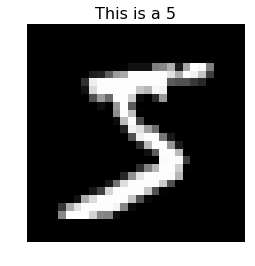

In [213]:
train_data, test_data = mnist.load_data()

number_images, number_labels = train_data
x_test, y_test = test_data

num_images_to_show = 1

show_numbers(number_images[0:num_images_to_show], number_labels[0:num_images_to_show])

In [214]:
x_train = pre_process_data(number_images)
x_test = pre_process_data(x_test)

y_train = pre_process_labels(number_labels)
y_test = pre_process_labels(y_test)

### Create the Neural Network

In [215]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

loss_type = 'mean_squared_error'
model.compile(loss=loss_type, optimizer=RMSprop(), metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_26 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_27 (Dense)             (None, 10)                2570      
Total params: 269,322.0
Trainable params: 269,322
Non-trainable params: 0.0
_________________________________________________________________


### Train the Neural Network

In [216]:
batch_size = 128
epochs = 1

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=False, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

### Let's see what we get!

In [217]:
model_predictions = get_predictions(x_test, model)
print(model_predictions)

[7 2 1 ..., 4 5 6]


In [218]:
print("I got {}% right!".format(100. * np.sum((model_predictions == np.argmax(y_test, axis=1)).astype('uint8')) / len(y_test)))

I got 95.49% right!


In [223]:
print(model.predict(x_test)[0])

[  1.23962076e-04   7.18521278e-07   2.87383329e-04   1.93833606e-04
   7.35608239e-07   2.88108185e-05   4.46878161e-08   9.99258339e-01
   1.95564189e-05   8.66017290e-05]
